# Libraries, Headers and Stuff

In [1]:
import sys
sys.path.append('../../src')

In [2]:
N_STATES = 128
N_EPOCHS = 50
BATCH_SIZE = 32

MAX_VOCAB_SIZE = -1
MAX_SEQUENCE_SIZE = 100000#-1

LAYERS_TO_CHECK = [0,1]

import scores
METRIC = scores.Correlation()

SAMPLES_VERIFY = 8
TEST_RATIO = .1

In [3]:
import datetime
import os

FOLDER_OUT = 'Linux-' + str(datetime.datetime.today())
if not os.path.exists(FOLDER_OUT):
    os.makedirs(FOLDER_OUT)

In [4]:
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.


In [5]:
%load_ext rpy2.ipython

In [6]:
import random
random.seed(55555)

# Loads Model

In [7]:
import kernelhelpers
reload(kernelhelpers)

num_layer = 2

path = 'corpus/linux_kernel_val.txt'
model_weights = 'models/corpus_linux_kernel_val_architecture_stateful_type_char_layers_2_hidden_units_128_epoch_49_weights.h5'
model_settings_name = 'settings/corpus_linux_kernel_architecture_stateful_type_char_layers_2_hidden_units_128_settings.pickle'
new_batch_size = BATCH_SIZE
new_size = 1
new_time_skip = 1
is_stateful = True

# Loads the model
model,char2int,int2char,model_type = \
    kernelhelpers.load_setup(num_layer,
                path,
                model_weights,
                model_settings_name ,
                new_batch_size,
                new_size,
                new_time_skip,
                is_stateful)

128
lstm_2
128
lstm_3
Loading model settings/corpus_linux_kernel_architecture_stateful_type_char_layers_2_hidden_units_128_settings.pickle
type: basic_architecture


In [8]:
for layer in model.layers:
    print layer

# Creates dataset

In [9]:
raw_data = kernelhelpers.get_corpus('corpus/linux_input.txt')

print 'Number of charaters', len(raw_data)
print 'Number of charaters', len(set(raw_data))

Reading file corpus/linux_input.txt
Number of Words in Current Corpus: 6206996
Number of charaters 6206996
Number of charaters 75


In [10]:
import utils.preprocess as pre

# Generates data
full_size = len(raw_data)
train_size = int((1-TEST_RATIO) * full_size)

train_sequence = raw_data[:train_size]
test_sequence = raw_data[train_size:]

raw_train_sequence = [char2int[c] for c in train_sequence]
raw_test_sequence  = [char2int[c] for c in test_sequence]

# If necessary, truncates:
if MAX_SEQUENCE_SIZE > 0:
    train_size = int(MAX_SEQUENCE_SIZE * (1-TEST_RATIO))
    test_size = int(MAX_SEQUENCE_SIZE * TEST_RATIO)
    raw_train_sequence = raw_train_sequence[:train_size]
    raw_test_sequence  = raw_test_sequence[:test_size]

print 'Training smybols:', len(raw_train_sequence)
print 'Testing smybols:', len(raw_test_sequence)
print 'Size vocabulay:', len(char2int)

Training smybols: 90000
Testing smybols: 10000
Size vocabulay: 75


In [11]:
import numpy as np
import utils.preprocess as pre
reload(pre)

# Preprocesses training
# SPLITS
X_train_raw = raw_train_sequence[:-1]
y_train_raw = raw_train_sequence[1:]
# ENCODES
X_train = pre.one_hot_encode_seq(X_train_raw, n_chars=len(int2char))
y_train = pre.one_hot_encode_seq(y_train_raw, n_chars=len(int2char))
# SHUFFLES
train_indices = pre.shuffle_indices(len(X_train_raw), BATCH_SIZE)
y_train = y_train[train_indices]
# EXPANDS
X_train = X_train[train_indices,np.newaxis,:]

# Preprocesses testing
# SPLITS
X_test_raw = raw_test_sequence[:-1]
y_test_raw = raw_test_sequence[1:]
# ENCODES
X_test = pre.one_hot_encode_seq(X_test_raw, n_chars=len(int2char))
y_test = pre.one_hot_encode_seq(y_test_raw, n_chars=len(int2char))
# SHUFFLES
test_indices = pre.shuffle_indices(len(X_test_raw), BATCH_SIZE)
X_test = X_test[test_indices, np.newaxis,:]
y_test = y_test[test_indices]

print "Training data:"
print "X:", X_train.shape
print "y:", y_train.shape

print "Test data:"
print "X:", X_test.shape
print "y:", y_test.shape

# Recovers the original training data
X_test_sequence = test_sequence[:X_test.shape[0]]
y_test_sequence = test_sequence[1:X_test.shape[0]+1]
print 'Test sequences:', X_test_sequence[:5], y_test_sequence[:5]
print 'length:', len(X_test_sequence), len(y_test_sequence)

Training data:
X: (89984, 1, 75)
y: (89984, 75)
Test data:
X: (9984, 1, 75)
y: (9984, 75)
Test sequences: ['_', 'k', 't', 'h', 'r'] ['k', 't', 'h', 'r', 'e']
length: 9984 9984


# Evaluate

In [12]:
model.reset_states()
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

9952/9984 [============================>.] - ETA: 0s('Test score:', 1.1624343960713117)
('Test accuracy:', 0.67047275641025639)


In [13]:
# Generate samples
import generator as gen
reload(gen)

print gen.complete_sentence_stateful('if ', model, 256, char2int, int2char, BATCH_SIZE)
print '*****'
print gen.complete_sentence_stateful('else', model, 256, char2int, int2char, BATCH_SIZE)

Dimensions of sentence after encoding: (32, 3, 75)
Dimensions of sentence after generation: (32, 260, 75)
if remore trace idle any notifier created it.
		 * must be properly concuplested, we
		 * mms usul ifn the
		 * semitte shared blocked up have false.
		 */
		tspecialld = 0;
	}

	return check_wakeup(is);
	bug_on(lock->normal != &rdp->name, now, newvoid) {
				
*****
Dimensions of sentence after encoding: (32, 4, 75)
Dimensions of sentence after generation: (32, 261, 75)
elsectem_cleanup(tick_cpu_rq_unlock_lock.op);

	break;
}
nxt_sequst(srace rlockf_avoccu_is_kprobe_pst_mask),
			          int ret = 0;
out:
	rcu_reser_for_each_entry(rq, p, _real_tick_char2(kbuf, rnp, kmall);
}

#ifdef config_dccu_sync_dreader
 *
       tasklet


# Extracts features

In [14]:
import features as feat
reload(feat)

alphabet = feat.alphabet()
brackets = feat.is_enclosed_bin('(', ')')
curly_brackets = feat.is_enclosed_bin('{', '}')
linepos = feat.line_char_pos()
comments = feat.is_enclosed_str_nodepth('/*','*/')
indent = feat.line_indent_level()
word_hash = feat.char_word_hash(50)
features = [alphabet, linepos, brackets, curly_brackets, linepos, comments, indent, word_hash]

In [15]:
reload(feat)

feature_frame_x = feat.FeatureFrame(features, X_test_sequence)
feature_frame_x.extract()

feature_frame_y = feat.FeatureFrame(features, y_test_sequence)
feature_frame_y.extract()

print'Features for test sequence:'
print feature_frame_x.names
print feature_frame_x.values[:25,:]

print 'Features for test sequence labels:'
print feature_frame_y.names
print feature_frame_y.values[:25,:]

Generating feature scores
Running feature 0 out of 8
Added features ['char_\t', 'char_\n', 'char_!', 'char_ ', 'char_#', '...']
Running feature 1 out of 8
Added features ['line_pos']
Running feature 2 out of 8
Added features ['dep_()_1', 'dep_()_2', 'dep_()_3', 'dep_()_4']
Running feature 3 out of 8
Added features ['dep_{}_1', 'dep_{}_2', 'dep_{}_3']
Running feature 4 out of 8
Added features ['line_pos']
Running feature 5 out of 8
Added features ['enc_/**/']
Running feature 6 out of 8
Added features ['indent0', 'indent1', 'indent2', 'indent3', 'indent4', '...']
Running feature 7 out of 8
Added features ['n_gram_0', 'n_gram_1', 'n_gram_2', 'n_gram_3', 'n_gram_4', '...']
Tidying...
Computed feature matrix, with shape: (9984, 123)
Snippet of the features
l = rdp->nocb_gp_head;
		smp_mb__after_atomic(); /
['char_\t', 'char_\n', 'char_!', 'char_ ', 'char_#', 'char_"', 'char_%', "char_'", 'char_&', 'char_)', 'char_(', 'char_+', 'char_*', 'char_-', 'char_,', 'char_/', 'char_.', 'char_1', 'cha

# Extracts hidden states

In [16]:
import extractor
reload(extractor)
    
ex=extractor.Extractor(model, LAYERS_TO_CHECK)
states = ex.get_states(X_test, batch_size=BATCH_SIZE, unshuffle=True)
nn_config = ex.get_structure()
nn_offsets = ex.get_offets()

print 'states shape:', states.shape
print 'config:', nn_config
print 'offets:', nn_offsets

BEWARE _ ONLY SUPPORTS CONSECUTIVE LAYER IDS STARTING AT 0
Creates spy models
... for id 0 : <controllers.mylstm_legacy.MYLSTM object at 0x11903f790>
... for id 1 : <controllers.mylstm_legacy.MYLSTM object at 0x11903fb10>
Gets the activations for the hidden states
Gets structure
Gets offets
WARNING +++ NOT SUITABLE FOR NON_FORWARD LAYERS
Gets structure
states shape: (9984, 256)
config: [('<controllers.mylstm_legacy.MYLSTM object at 0x11903f790>', 1, 128), ('<controllers.mylstm_legacy.MYLSTM object at 0x11903fb10>', 1, 128)]
offets: {(1, 0): 0, (0, 0): 0}


In [17]:
feat_names, feat_mat = feature_frame_x.data

/Users/thib/.virtualenvs/keras/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attachement du package : ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/Users/thib/.virtualenvs/keras/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/Users/thib/.virtualenvs/keras/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


  [1] "_"  "k"  "t"  "h"  "r"  "e"  "a"  "d"  ")"  ")"  "\n" "\t" "\t" "r"  "e" 
 [16] "t"  "u"  "r"  "n"  ";"  "\n" "\t" "i"  "f"  " "  "("  "a"  "c"  "c"  "e" 
 [31] "s"  "s"  "_"  "o"  "n"  "c"  "e"  "("  "r"  "d"  "p"  "_"  "l"  "e"  "a" 
 [46] "d"  "e"  "r"  "-"  ">"  "n"  "o"  "c"  "b"  "_"  "l"  "e"  "a"  "d"  "e" 
 [61] "r"  "_"  "s"  "l"  "e"  "e"  "p"  ")"  " "  "|"  "|"  " "  "f"  "o"  "r" 
 [76] "c"  "e"  ")"  " "  "{"  "\n" "\t" "\t" "/"  "*"  " "  "p"  "r"  "i"  "o" 
 [91] "r"  " "  "s"  "m"  "p"  "_"  "m"  "b"  "_"  "_"  "a"  "f"  "t"  "e"  "r" 
[106] "_"  "a"  "t"  "o"  "m"  "i"  "c"  "("  ")"  " "  "o"  "r"  "d"  "e"  "r" 
[121] "s"  " "  "a"  "g"  "a"  "i"  "n"  "s"  "t"  " "  "p"  "r"  "i"  "o"  "r" 
[136] " "  "e"  "n"  "q"  "u"  "e"  "u"  "e"  "."  " "  "*"  "/"  "\n" "\t" "\t"


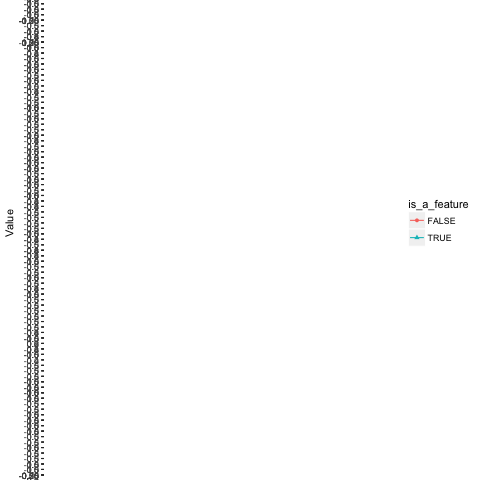

In [18]:
%%R -i feat_names,feat_mat,states,X_test_sequence,FOLDER_OUT

library(ggplot2)
library(scales)
library(dplyr)
library(tidyr)

states_col_names <- paste0('_', 0:(ncol(states)-1))
colnames(states) <- states_col_names
colnames(feat_mat) <- feat_names

to_plot <- cbind(states, feat_mat)
to_plot <- as.data.frame(to_plot)
to_plot[['time']] <- 1:nrow(to_plot)
to_plot <-  gather(to_plot, key='Series', value='Value', -time)
to_plot[['is_a_feature']] <- ! to_plot$Series %in% states_col_names

to_plot <- filter(to_plot, Series %in%states_col_names | is_a_feature)
MAX_TIME <- 150 
to_plot <- filter(to_plot, time <= MAX_TIME)

labels <- X_test_sequence[1:MAX_TIME]
print(labels)

p <- ggplot(to_plot, aes(x=time, y=Value, fill=is_a_feature, color=is_a_feature, shape = is_a_feature)) +
            scale_x_continuous(breaks = sort(unique(to_plot$time)), labels = labels) +
            #scale_y_continuous(limits = c(-1,1), breaks=c(-1,1)) +
            geom_line() +
            geom_point() +
            facet_grid(Series~., scales="free")

ggsave(paste0(FOLDER_OUT, '/activations.pdf'), p, width=40, height=49)

# Correlation based attribution

In [19]:
import scores
reload(scores)
import inspector as ip
reload(ip)

insp = ip.Inspector(nn_config, nn_offsets)
mi_scores, names = insp.inspect(states, feature_frame_x, scores.Correlation())

Computing attribution scores
Feture matrix dimensions: (620672, 143)
States dimensions: (620672, 256)
Computing score for feature 0: char_	
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 1: char_

Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 2: char_�
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 3: char_!
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 4: char_ 
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 5: char_#
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 6: char_"
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Co

Computing score for feature 63: char_w
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 64: char_v
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 65: char_y
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 66: char_x
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 67: char_{
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 68: char_z
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 69: char_}
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 70: char_|
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timest

Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 126: n_gram_33
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 127: n_gram_34
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 128: n_gram_35
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 129: n_gram_36
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 130: n_gram_37
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 131: n_gram_38
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for feature 132: n_gram_39
Layer 0
Timestep 0
Scoring neurons 0 to 127
Layer 1
Timestep 0
Scoring neurons 128 to 255
Computing score for fea

In [20]:
fname = FOLDER_OUT + '/attributions'
hnames = [repr(n) for n in names]
header = ','.join(hnames)
np.savetxt(fname, mi_scores, delimiter=',', header=header, comments='')

In [21]:
%%R -i mi_scores
values <- c(mi_scores)
hist(values, breaks=30)

In [22]:
feature_neurons = insp.filter_attributions(ip.filter_threshold_abs(.1))
non_feature_neurons = insp.not_attributed()
feature_neurons

{'char_\t': [(0, 0, 1),
  (0, 0, 2),
  (0, 0, 3),
  (0, 0, 5),
  (0, 0, 6),
  (0, 0, 10),
  (0, 0, 13),
  (0, 0, 15),
  (0, 0, 16),
  (0, 0, 18),
  (0, 0, 23),
  (0, 0, 24),
  (0, 0, 26),
  (0, 0, 28),
  (0, 0, 29),
  (0, 0, 31),
  (0, 0, 32),
  (0, 0, 35),
  (0, 0, 36),
  (0, 0, 37),
  (0, 0, 38),
  (0, 0, 39),
  (0, 0, 41),
  (0, 0, 42),
  (0, 0, 43),
  (0, 0, 45),
  (0, 0, 46),
  (0, 0, 50),
  (0, 0, 51),
  (0, 0, 52),
  (0, 0, 56),
  (0, 0, 58),
  (0, 0, 60),
  (0, 0, 62),
  (0, 0, 63),
  (0, 0, 65),
  (0, 0, 67),
  (0, 0, 75),
  (0, 0, 76),
  (0, 0, 77),
  (0, 0, 78),
  (0, 0, 81),
  (0, 0, 84),
  (0, 0, 86),
  (0, 0, 88),
  (0, 0, 93),
  (0, 0, 94),
  (0, 0, 96),
  (0, 0, 97),
  (0, 0, 100),
  (0, 0, 101),
  (0, 0, 103),
  (0, 0, 104),
  (0, 0, 106),
  (0, 0, 109),
  (0, 0, 110),
  (0, 0, 111),
  (0, 0, 114),
  (0, 0, 115),
  (0, 0, 117),
  (0, 0, 119),
  (0, 0, 121),
  (0, 0, 123),
  (0, 0, 124),
  (0, 0, 125),
  (0, 0, 126),
  (0, 0, 127),
  (1, 0, 0),
  (1, 0, 1),
  (1, 0, 3),

In [23]:
is_selected = np.zeros_like(mi_scores)
for j, fname in enumerate(names):
    for adress in feature_neurons[fname]:
        i = insp.address_to_column(*adress)
        is_selected[i,j] = 1

In [24]:
%%R -i mi_scores,names,is_selected,N_STATES,FOLDER_OUT

library(ggplot2)
library(scales) 
library(dplyr)
library(tidyr)

# Gets scores
data <- as.data.frame(mi_scores)
names(data) <- names
data[['Neuron']] <- factor(0:(nrow(data)-1),
                           levels = 0:(nrow(data)-1),
                           labels = as.character(0:(nrow(data)-1)))
data <- gather(data, key='Feature', value='Score', -Neuron)

# Gets neuron selection
sel <- as.data.frame(is_selected)
names(sel) <- names
sel[['Neuron']] <- factor(0:(nrow(sel)-1),
                           levels = 0:(nrow(sel)-1),
                           labels = as.character(0:(nrow(sel)-1)))
sel <- gather(sel, key='Feature', value='selected', -Neuron)
sel$selected <- ifelse(sel$selected == 1, 'X', '')

# joins
to_plot <- inner_join(data,sel, by = c("Neuron", "Feature"))

p <- ggplot(to_plot, aes(x=Feature, y=Neuron, fill=Score, label=selected)) + 
                geom_bin2d(aes='identity') +
                geom_text(color='red') +
                scale_fill_gradient2(midpoint=median(to_plot$Score),
                                    low = muted("blue"), mid = "white",high = muted("red"),
                                    limits=c(0,NA)) +
                theme(axis.text.x = element_text(angle=90))

ggsave(paste0(FOLDER_OUT, '/attribution_map.pdf'), p, width=40, height=40)
p

/Users/thib/.virtualenvs/keras/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/Users/thib/.virtualenvs/keras/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Ignoring unknown parameters: aes

  warnings.warn(x, RRuntimeWarning)


# Does the Unit Test

In [25]:
import scores
out_base = insp.test(states, feature_frame_x, non_feature_neurons, scores.LogRegF1())
out_base

Computing scores for char_o
Computing scores for char_n
Computing scores for char_m
Computing scores for char_l
Computing scores for char_k
Computing scores for char_j
Computing scores for char_i
Computing scores for char_h
Computing scores for char_g
Computing scores for char_f
Computing scores for char_e
Computing scores for char_d
Computing scores for char_c
Computing scores for char_b
Computing scores for char_a
Computing scores for char_`
Computing scores for char_~


/Users/thib/.virtualenvs/keras/lib/python2.7/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


ERROR Cant compute score: Class label 1 not present.
Computing scores for char_}
Computing scores for char_|
Computing scores for char_{
Computing scores for char_z
Computing scores for char_y
Computing scores for char_x
Computing scores for char_w
Computing scores for char_v
Computing scores for char_u
Computing scores for char_t
Computing scores for char_s
Computing scores for char_r
Computing scores for char_q
Computing scores for char_p
Computing scores for char_3
Computing scores for char_@
Computing scores for char__
Computing scores for char_^
Computing scores for char_]
Computing scores for char_\
Computing scores for char_[
Computing scores for n_gram_18
Computing scores for n_gram_15
Computing scores for n_gram_14
Computing scores for n_gram_17
Computing scores for char_0
Computing scores for n_gram_11
Computing scores for n_gram_10
Computing scores for n_gram_13
Computing scores for n_gram_12
Computing scores for char_/
Computing scores for char_.
Computing scores for char_-

KeyboardInterrupt: 

In [ ]:
# With the correct neuronss 
out = insp.test(states, feature_frame_x, feature_neurons, scores.LogRegF1())
out

In [ ]:
# Prepares and saves a df
testnames = out.keys()
baseline = [out_base[t] for t in testnames]
candidate = [out[t] for t in testnames]

In [ ]:
%%R -i testnames,baseline,candidate,FOLDER_OUT

toplot <- data.frame(testnames, baseline, candidate)
write.csv(toplot, paste0(FOLDER_OUT,'/test_results'),row.names = FALSE)

dat <- gather(toplot, key='Setting', value='Accuracy', -testnames)

p <- ggplot(dat, aes(x=testnames, y=Accuracy, fill=Setting, color=Setting)) +
        geom_bar(stat='identity', position='dodge') +
        theme(axis.text.x = element_text(angle=90))

print(p)
ggsave(paste0(FOLDER_OUT, '/test_scores.pdf'), p, width=40, height=10)

# Kevinizes

In [ ]:
from controllers import control
reload(control)
import verify
reload(verify)

verifier = verify.Verifier(model, feature_neurons, non_feature_neurons)
v_scores = verifier.run(feature_frame_y, X_test, y_test, BATCH_SIZE, sample_size=SAMPLES_VERIFY)

In [ ]:
for feat in v_scores:
    print '---', feat
    for setup in v_scores[feat]:
        print '-', setup
        for y in v_scores[feat][setup]:
            s = v_scores[feat][setup][y]
            print y, ':', 'mean:', np.mean(s), '- sd:', np.std(s) 

In [ ]:
verifier.test_diff()

NameError: name 'feature_frame_x' is not defined

In [26]:
# Post experiment checks
feat_names = feature_frame_x.names
text = X_test_sequence
feat_mat = feature_frame_x.values

In [112]:
%%R -i feat_names,X_test_sequence,feat_mat,states

FEATURE <- c('char_i')
NEURON <- c('_156')

MIN_TIME <- 0
MAX_TIME <- 1000

library(ggplot2)
library(scales)
library(dplyr)
library(tidyr)

states_col_names <- paste0('_', 0:(ncol(states)-1))
colnames(states) <- states_col_names
colnames(feat_mat) <- feat_names

to_plot <- cbind(states, feat_mat)
to_plot <- as.data.frame(to_plot)
to_plot[['time']] <- 1:nrow(to_plot)
to_plot <-  gather(to_plot, key='Series', value='Value', -time)
to_plot[['is_a_feature']] <- ! to_plot$Series %in% states_col_names


to_plot <- filter(to_plot, Series %in% states_col_names | is_a_feature)
to_plot <- filter(to_plot, Series %in% c(FEATURE, NEURON))
to_plot <- filter(to_plot, time >= MIN_TIME, time <= MAX_TIME)

labels <- X_test_sequence[MIN_TIME:MAX_TIME]


p <- ggplot(to_plot, aes(x=time, y=Value, fill=is_a_feature, color=is_a_feature, shape = is_a_feature)) +
            scale_x_continuous(breaks = sort(unique(to_plot$time)), labels = labels) +
            #scale_y_continuous(limits = c(-1,1), breaks=c(-1,1)) +
            geom_line() +
            geom_point() +
            facet_grid(Series~., scales="free")
print(p)

fi <- paste0('~/Desktop/focus', paste0(FEATURE, collapse=""), paste0(NEURON, collapse=""), '.pdf')
h <- length(FEATURE) + length(NEURON)
ggsave(fi, p, width=40, height=h)